### ASTR 8070: Astrostatistics
***N. Pol***
___

# Homework 9
### Due: Friday, Apr 18th at 11.59pm CDT
---

The first homework problem this week is very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.

$$ output = w1 \times x1 + w2 \times x2 + b$$

The model will not learn nonlinearities as the activation function is linear. For it to learn nonlinearities, we need a non-linear activation function such as tanh or ReLU. The model did not classify the data at all.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*

Yes, it is able to learn some nonlinearities. However, the data is still not modeled effectively as there is one section where the data is still mixed up.

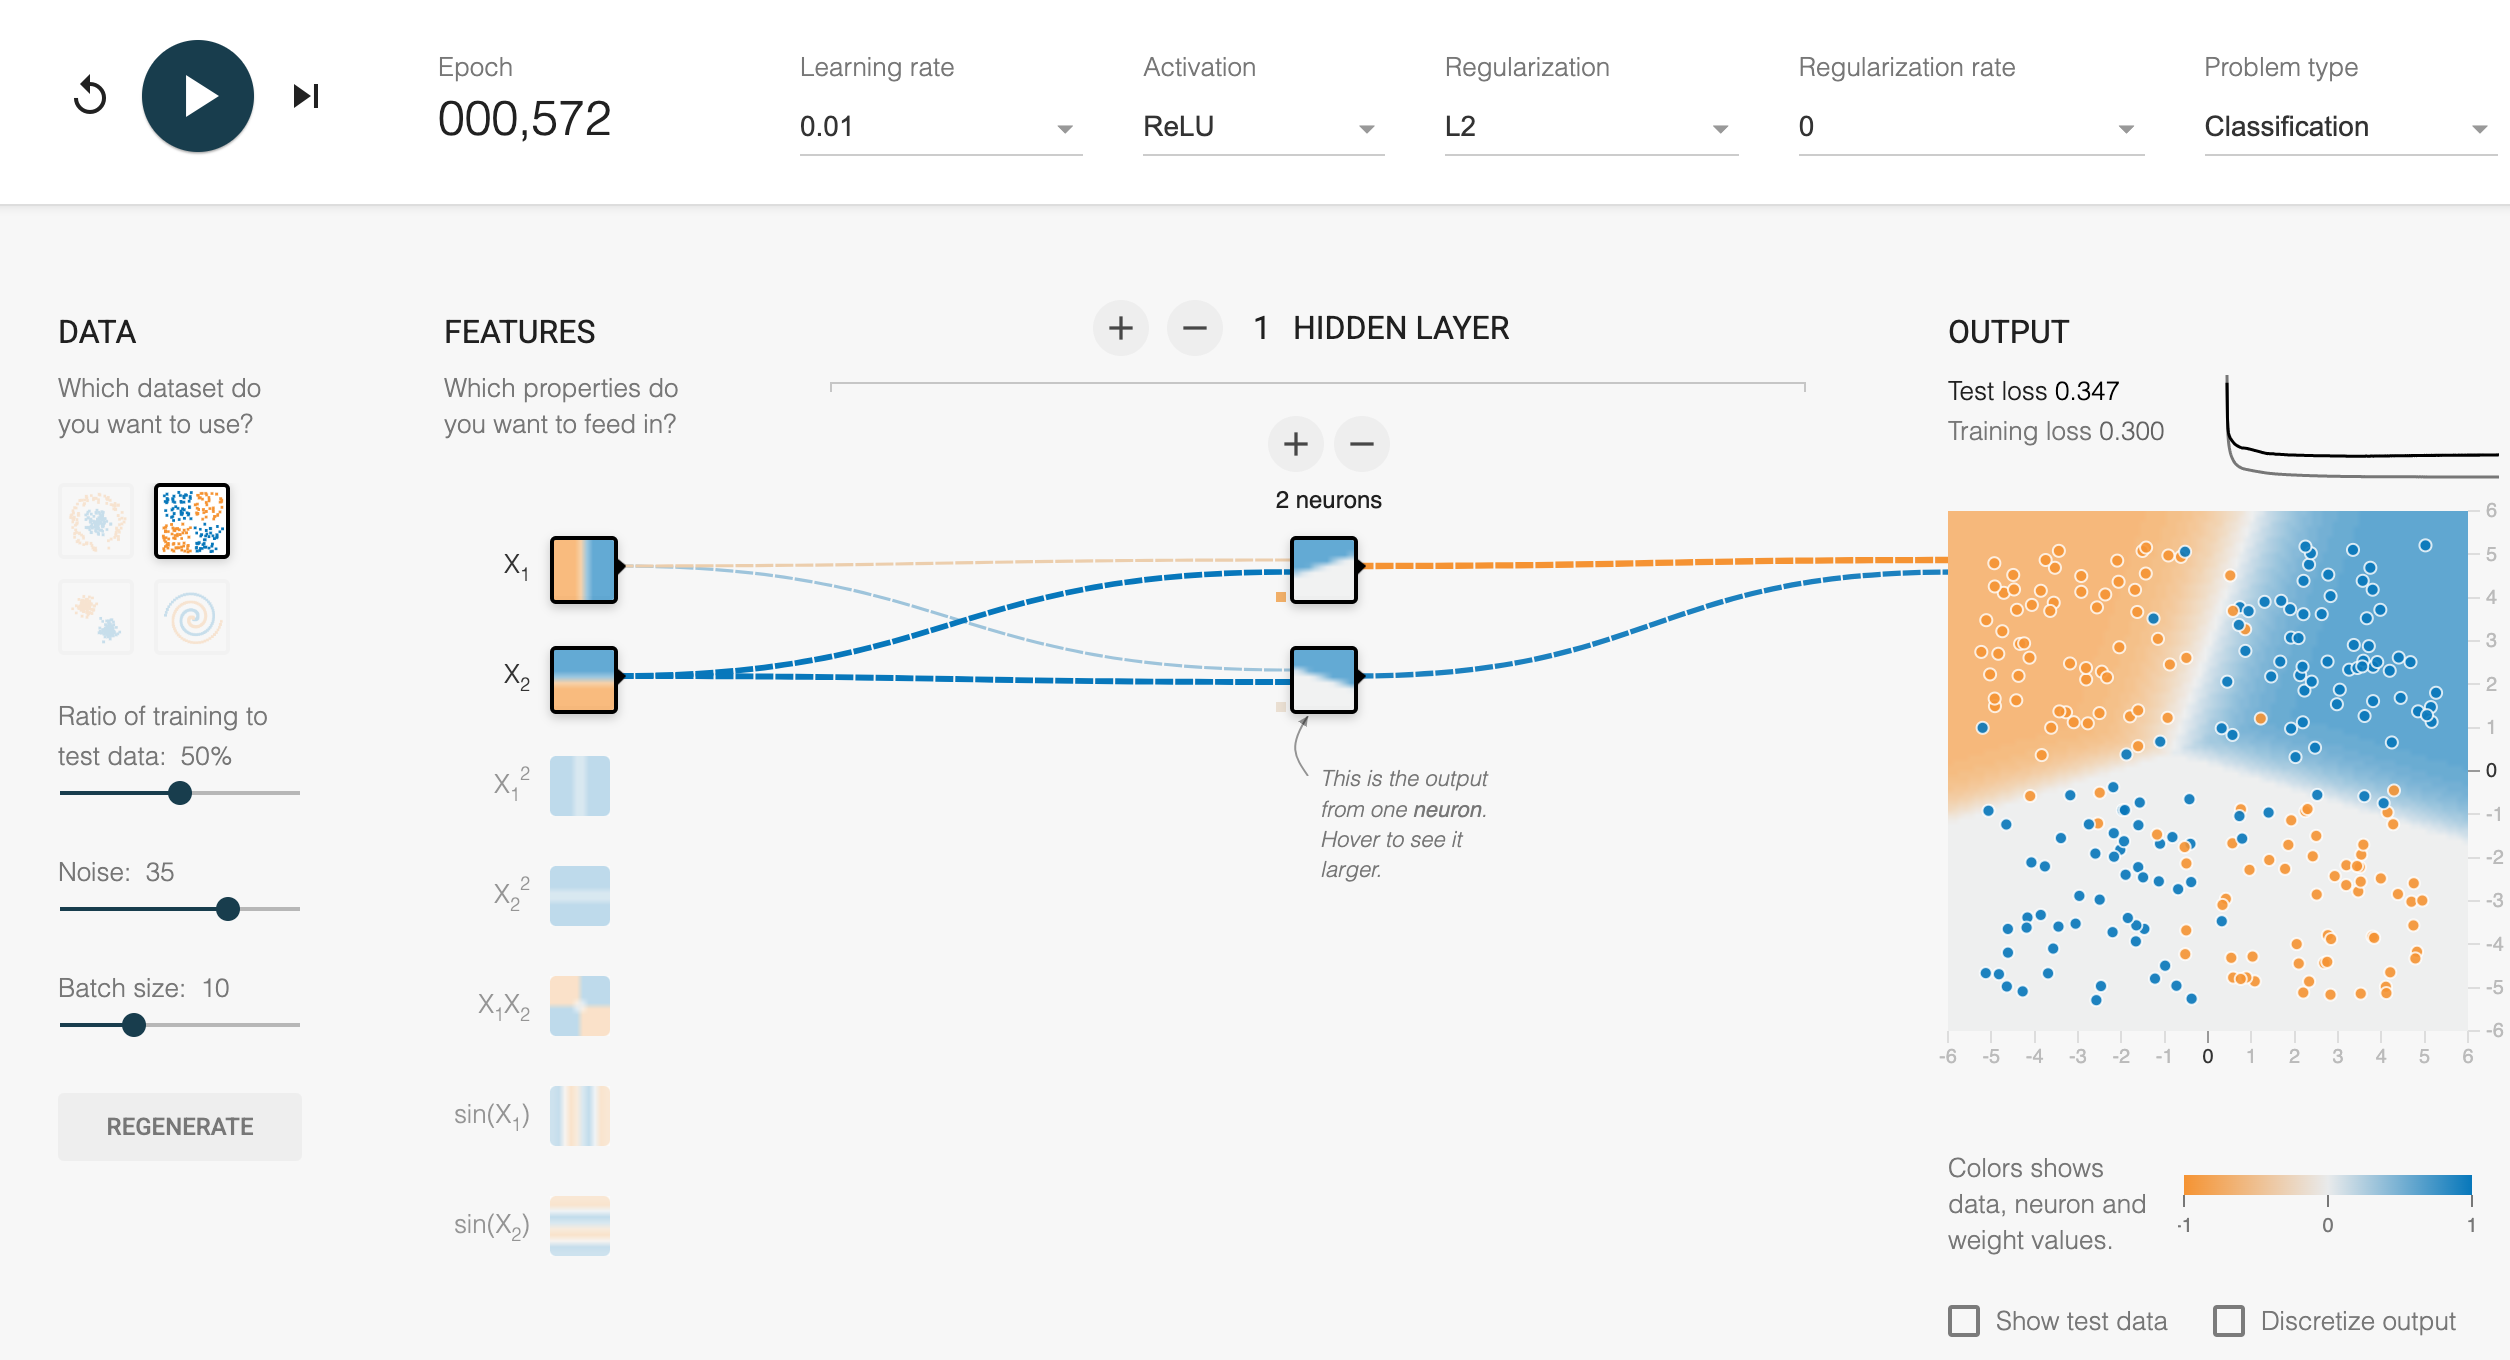

3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?

Yes, this time the model was able to classify the data very effectively, as can be seen in the figure. It was also much easier to reach this classification, i.e., in less epochs.

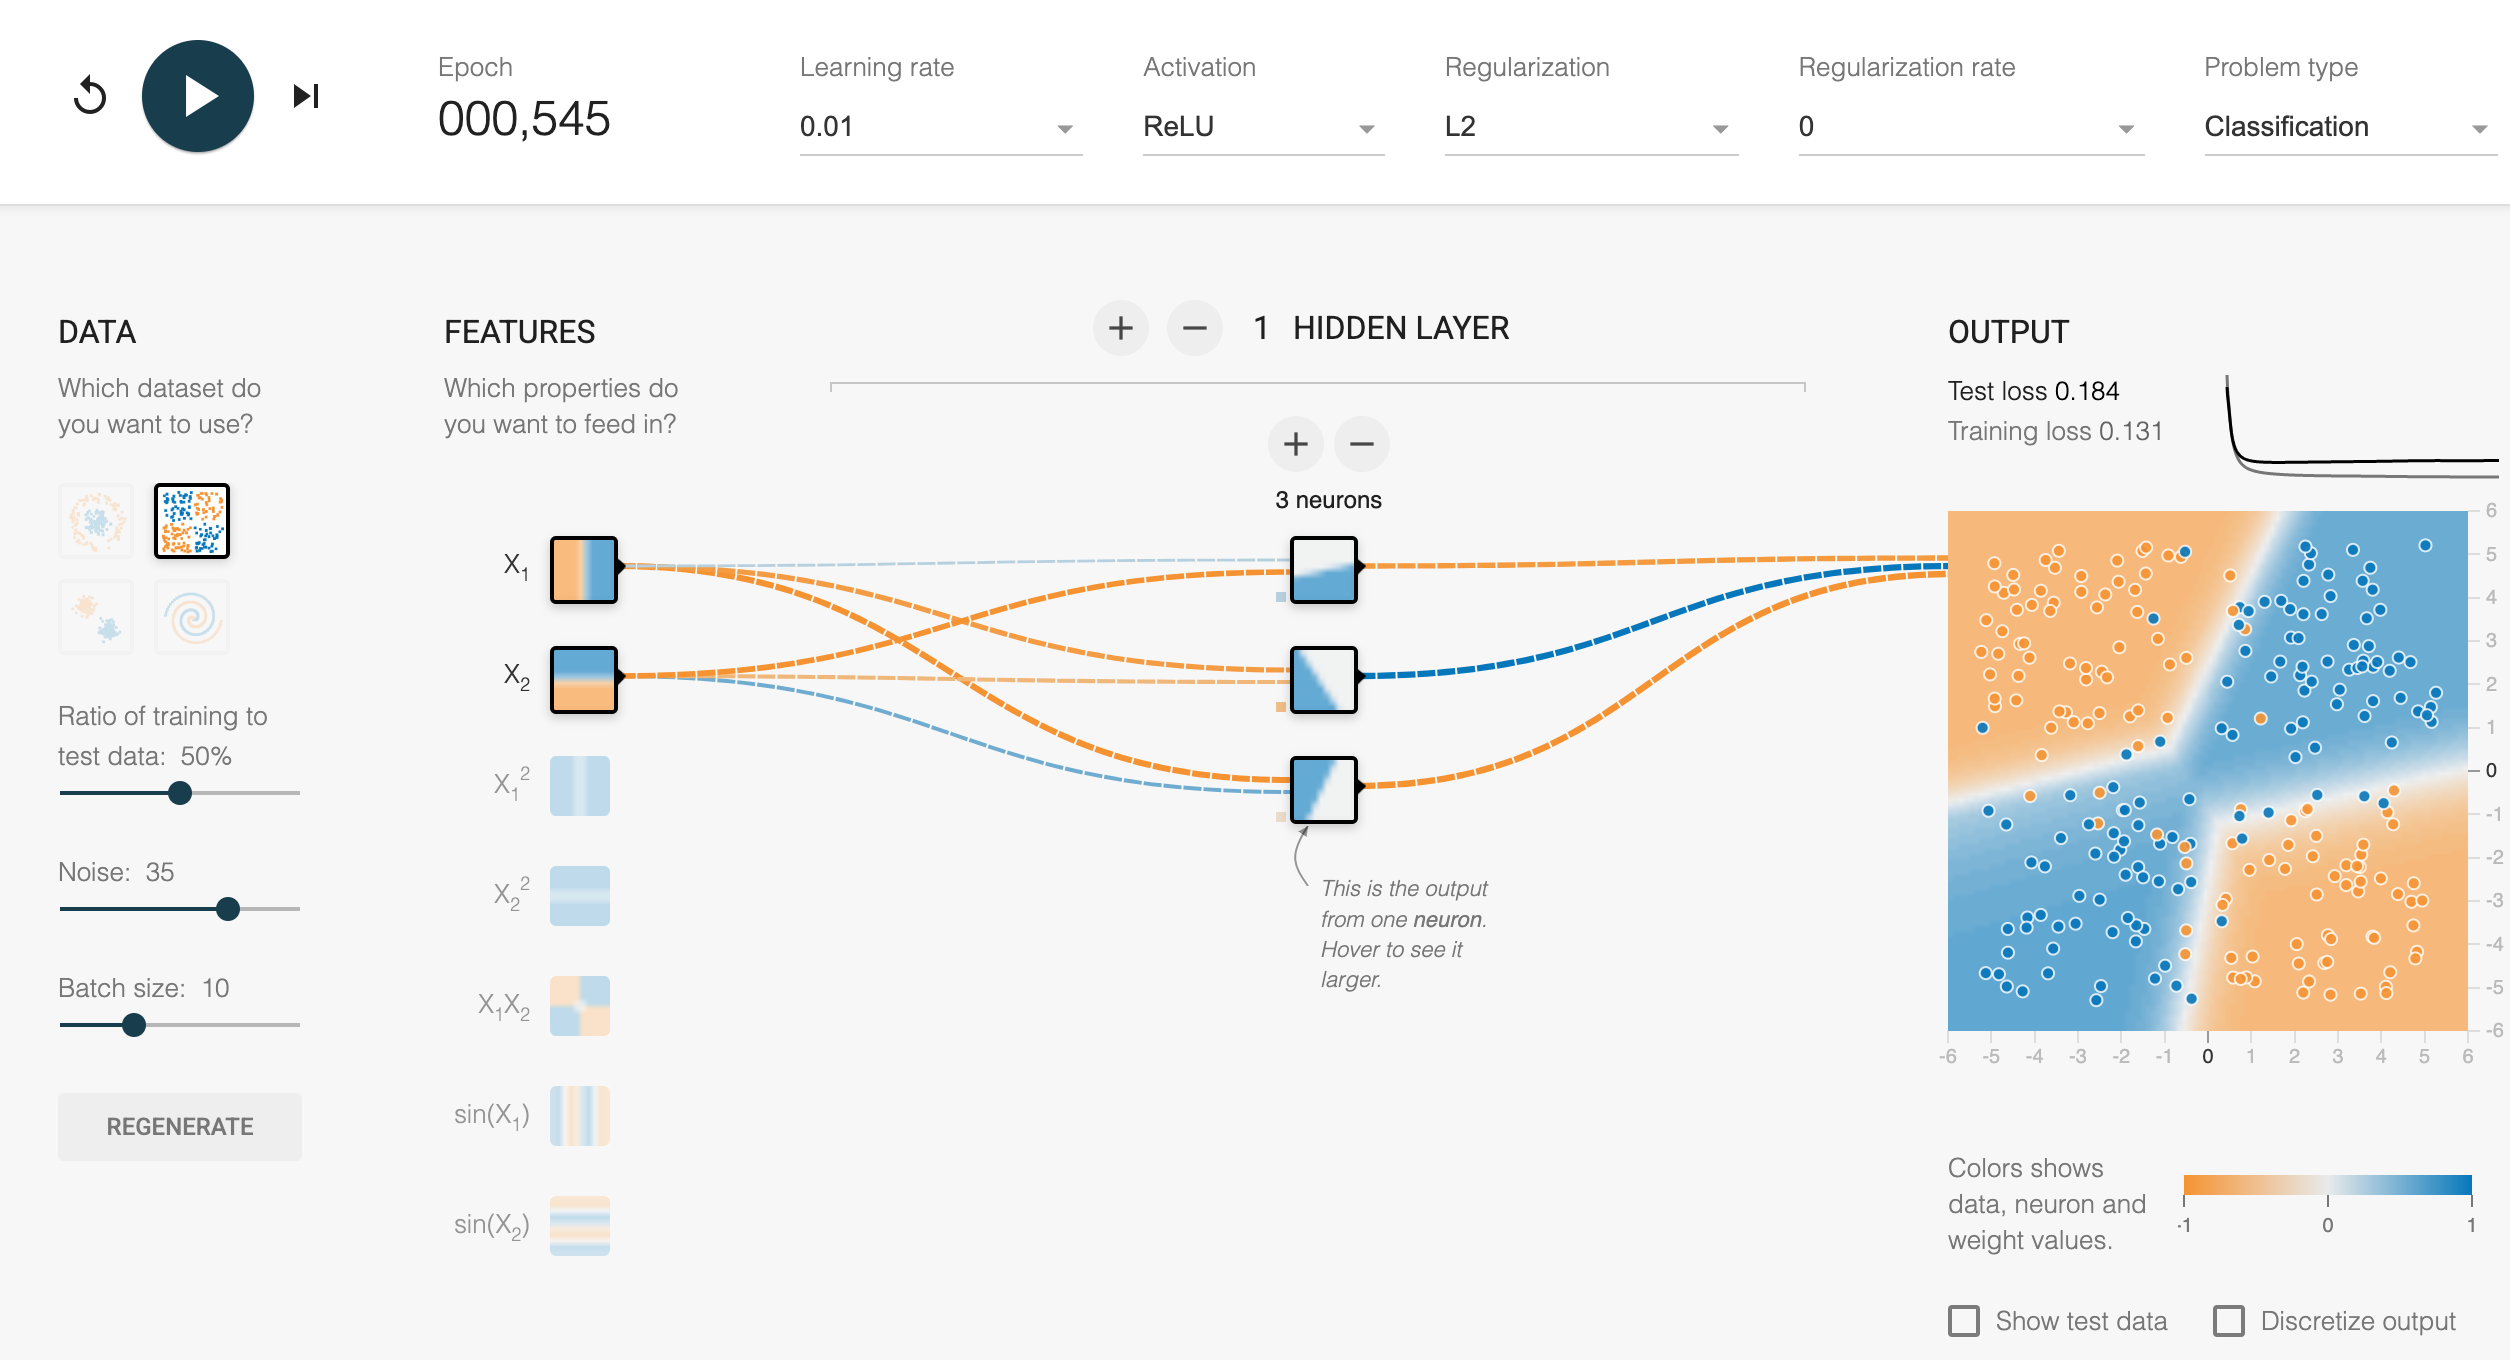

4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?

The above configuration with one hidden layer with 3 neurons is the smallest combination which is giving me a test loss of 0.184 which I guess is not so above 0.177. 

5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.


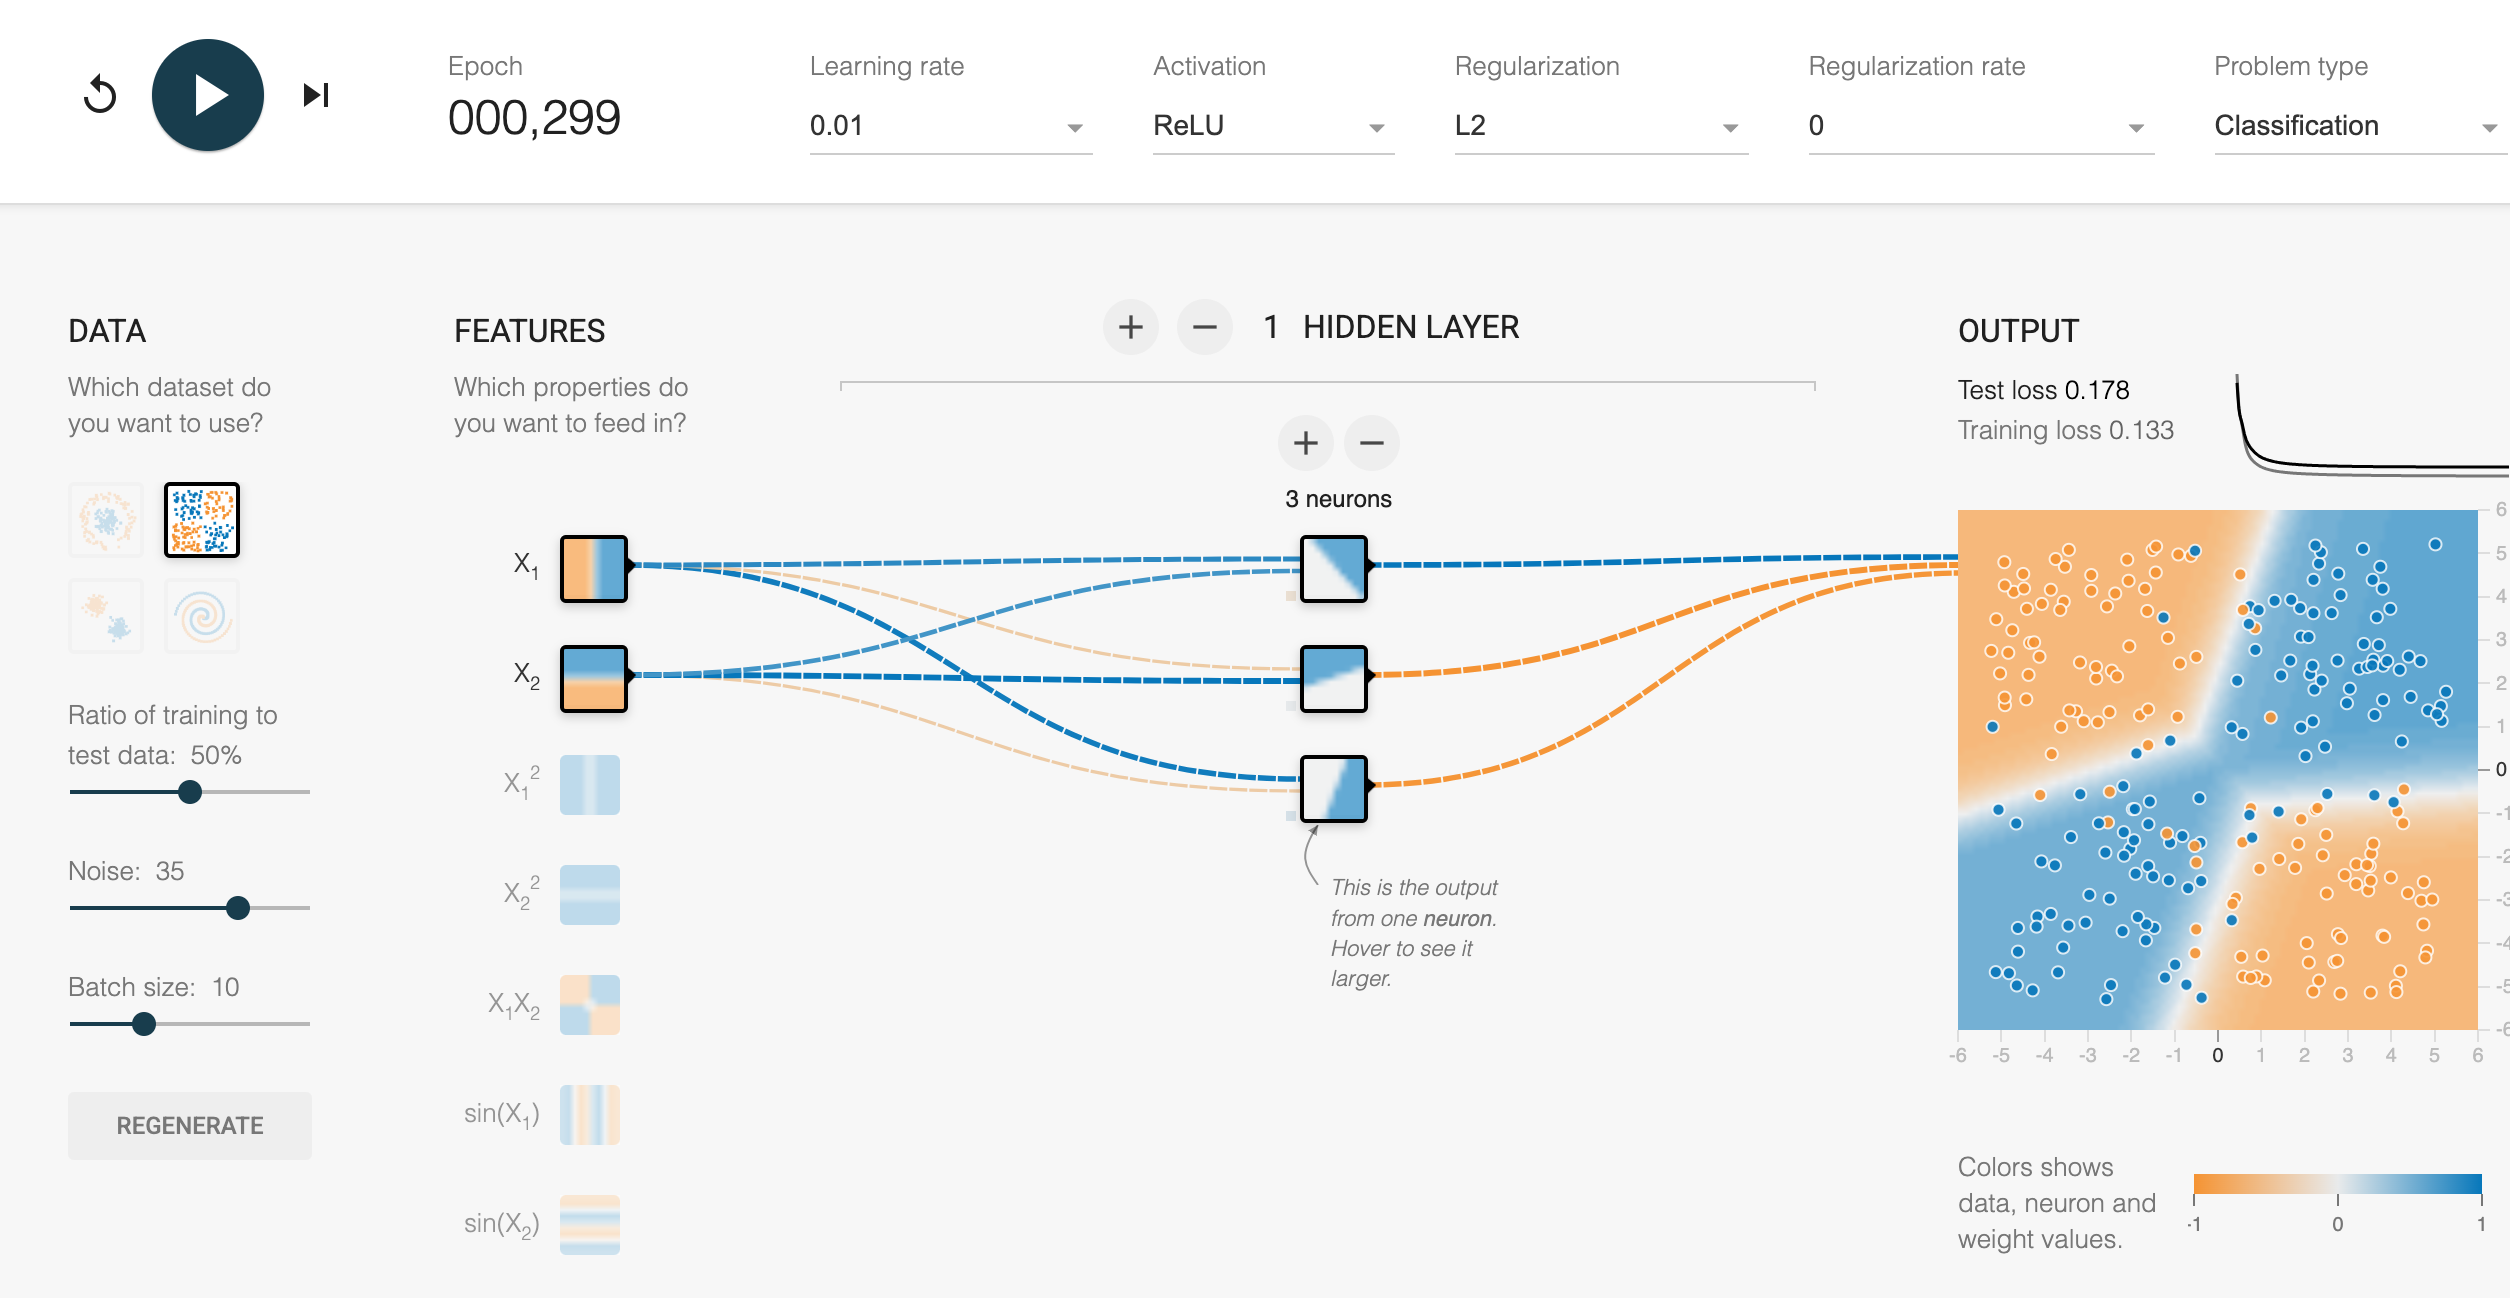

- Second hidden layer with 3 neurons.


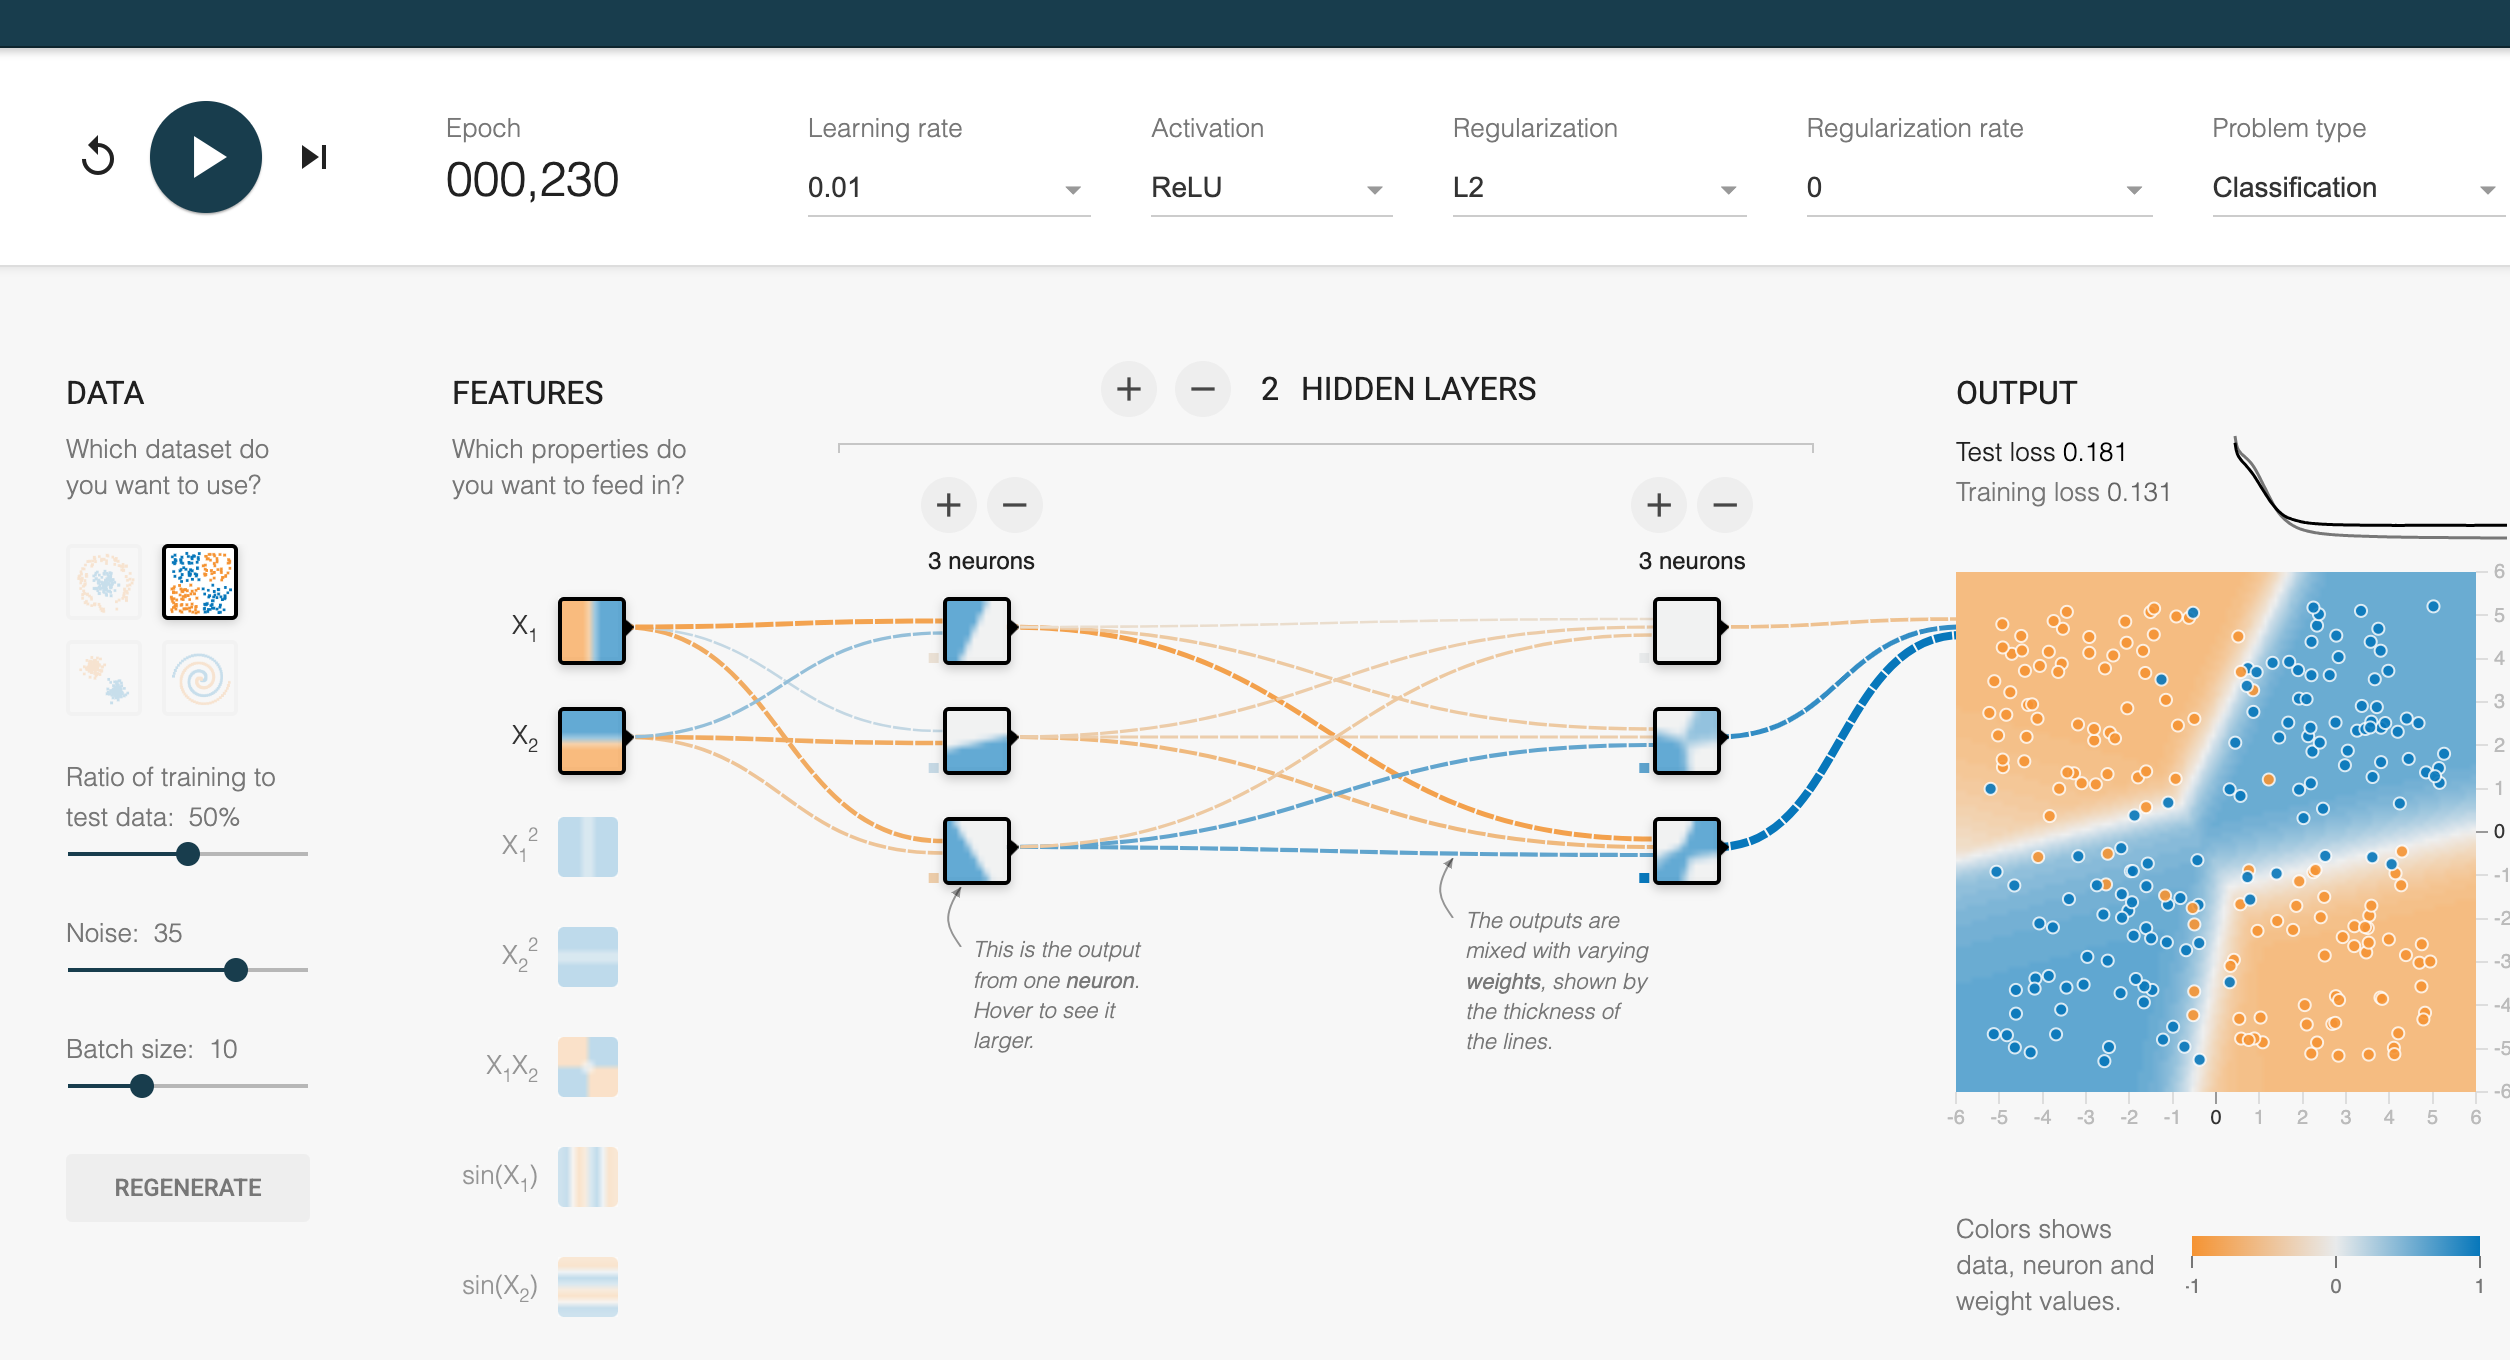

- Third hidden layer with 2 neurons.

  
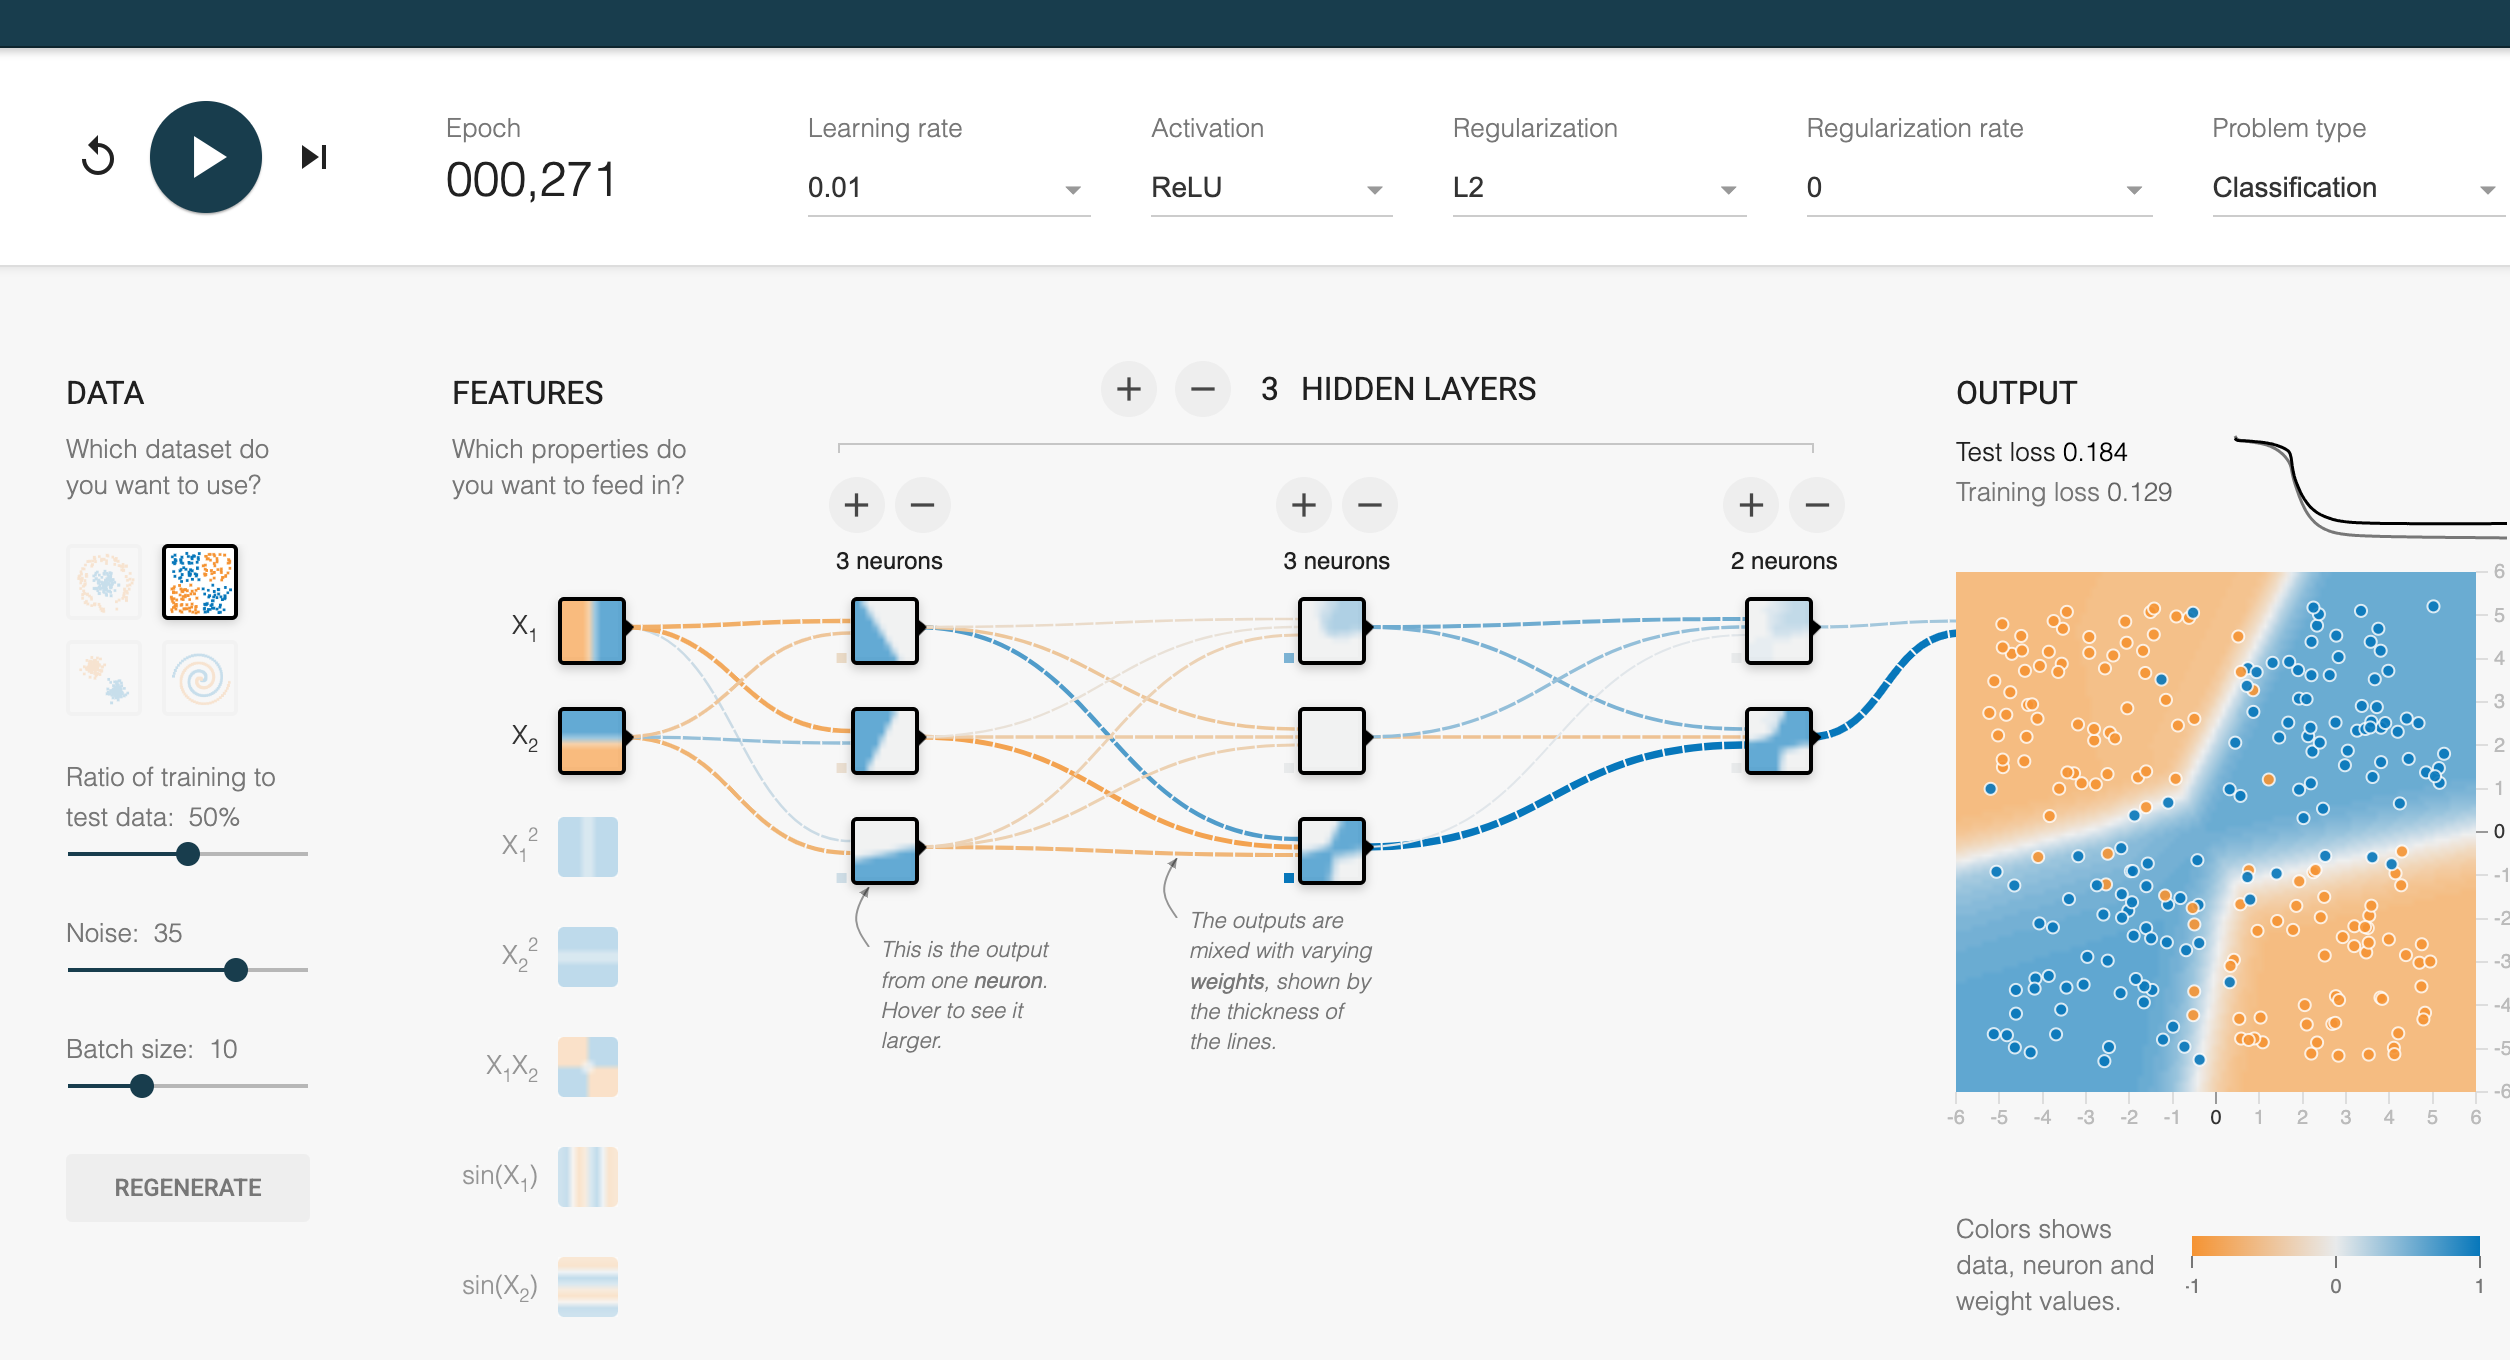

Adding a third layer did not improve the convergence time for the model. I think a two layers with 3 neurons suits the best.

## Problem 2

The first few steps of this problem are the same as last week's homework.


1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

# Solution 2

1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
data = np.load('hw_data/hw8_data_1.npy')
# data.shape
print("Column names:", data.dtype.names)

#create arrays
def colors(a,b):
    return data[a] - data[b]
ug = colors('u','g')
gr = colors('g','r')
ri = colors('r','i')
iz = colors('i','z')

z = data['redshift']
spec_class = data['specClass']

print(spec_class)
#count number of galaxies and quasars
galaxy = 0
qso = 0

for i in range(len(data)):
    if data['specClass'][i] == 'GALAXY':
        galaxy += 1

    if data['specClass'][i] == 'QSO':
        qso += 1

print("Number of Galaxies = ", galaxy)
print("Number of Quasars = ", qso)

Column names: ('u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err')
['QSO' 'GALAXY' 'GALAXY' ... 'QSO' 'QSO' 'QSO']
Number of Galaxies =  42808
Number of Quasars =  7192


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


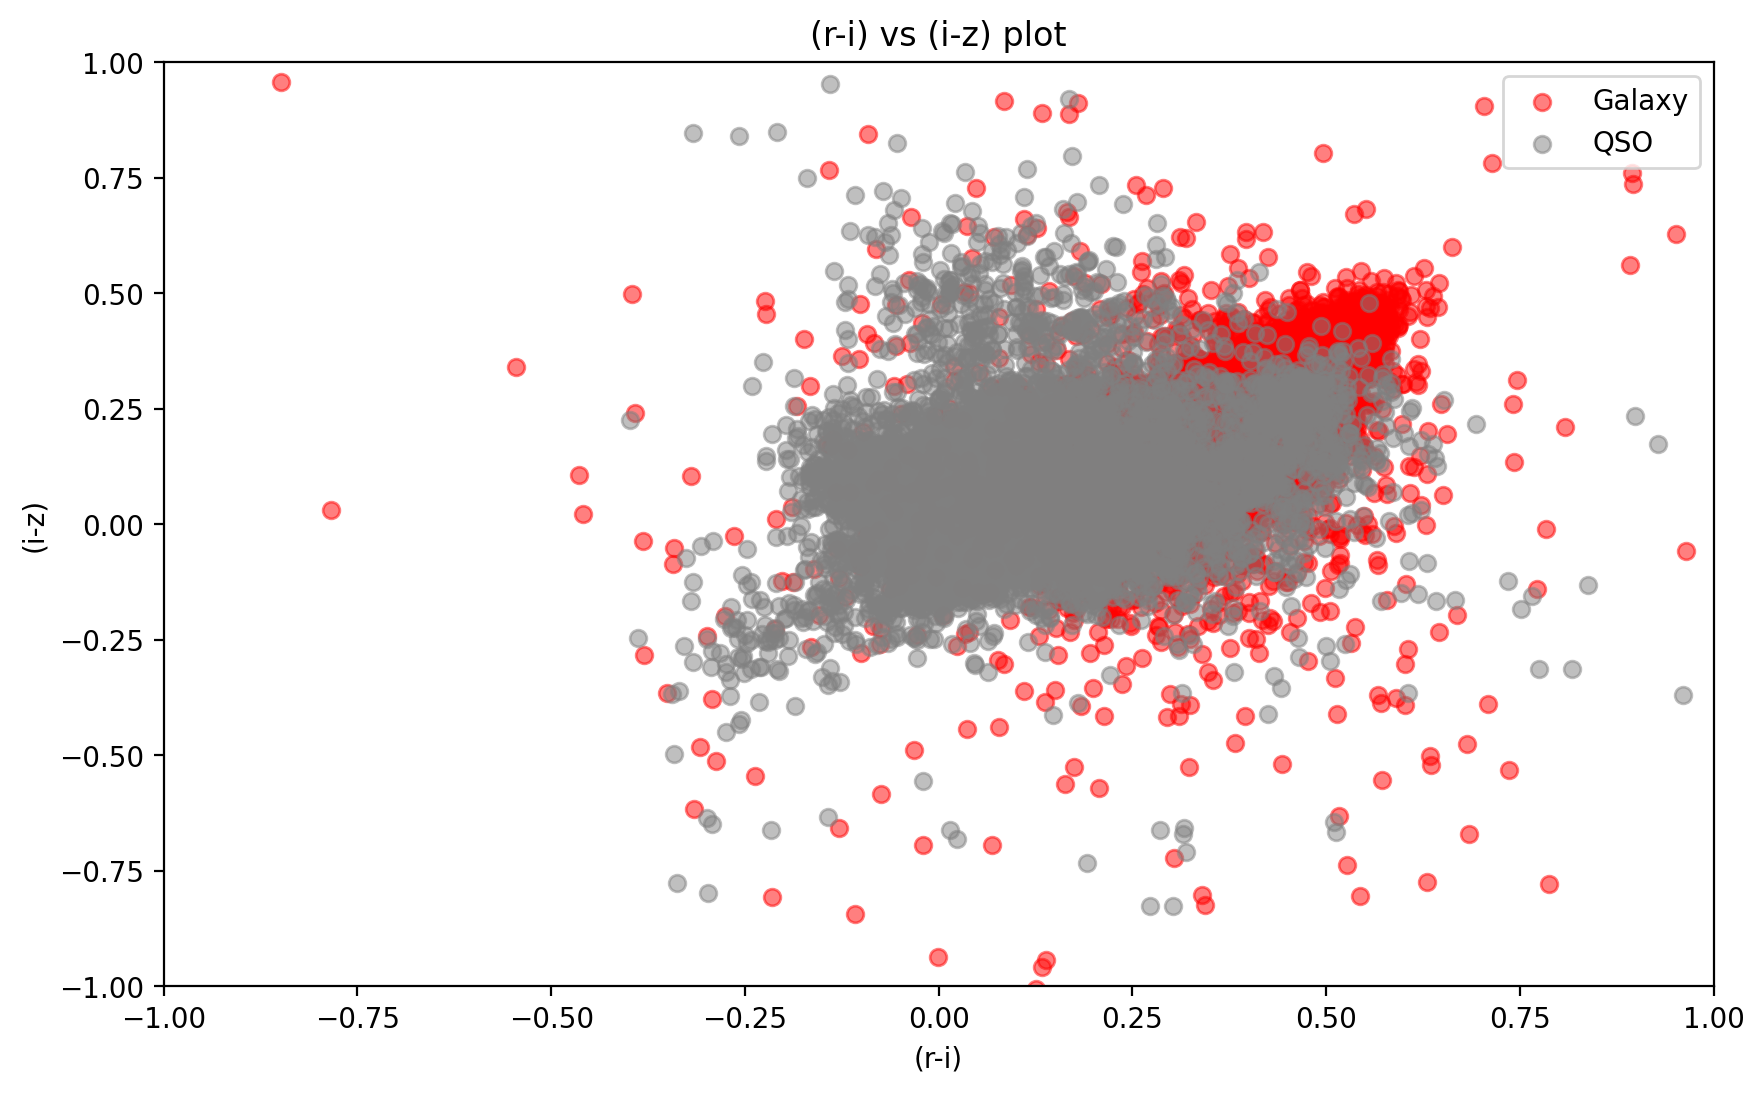

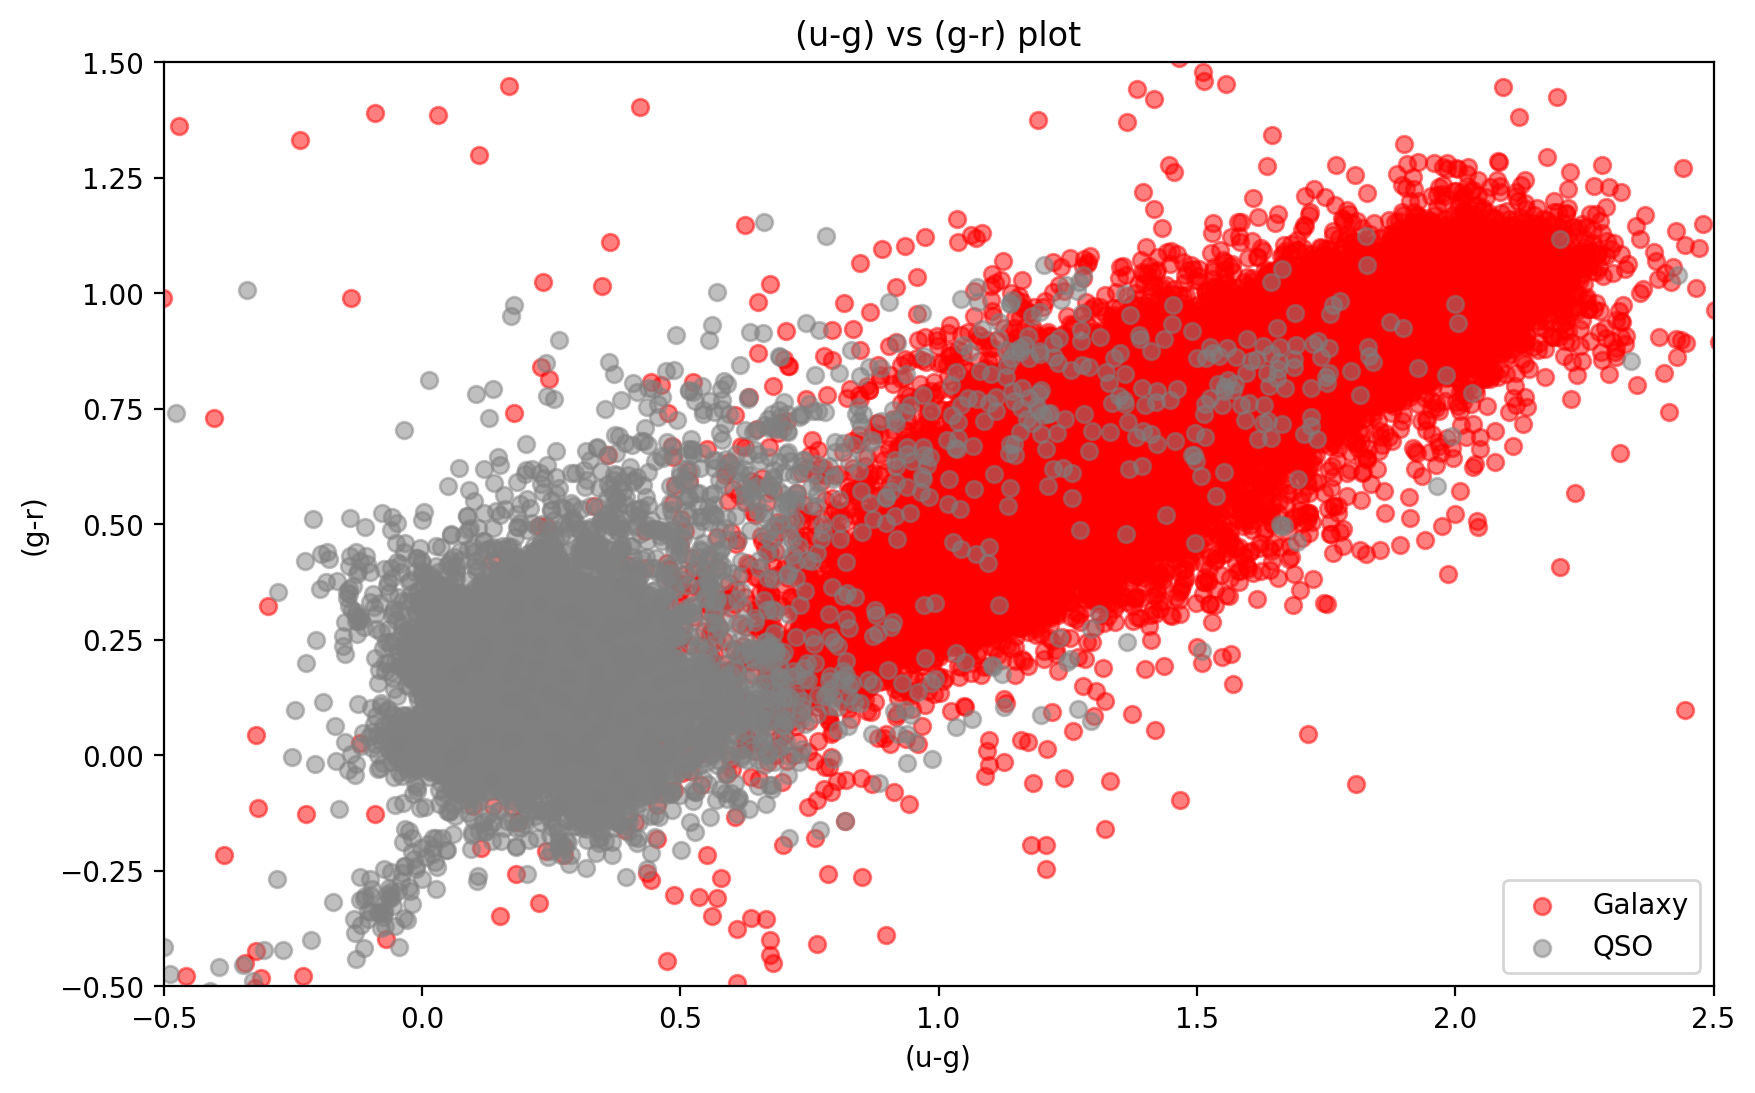

In [10]:
g_mask = spec_class == "GALAXY"
qso_mask = spec_class == "QSO"

plt.figure(figsize=(10, 6))
plt.scatter(ri[g_mask], iz[g_mask], c='red', alpha=0.5,label="Galaxy")
plt.scatter(ri[qso_mask], iz[qso_mask], c='grey', alpha=0.5,label="QSO")

plt.xlabel('(r-i)')
plt.ylabel('(i-z)')

plt.xlim(-1.0,1.0)
plt.ylim(-1.0,1.0)
plt.legend()
plt.title("(r-i) vs (i-z) plot")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(ug[g_mask], gr[g_mask], c='red', alpha=0.5,label="Galaxy")
plt.scatter(ug[qso_mask], gr[qso_mask], c='grey', alpha=0.5,label="QSO")

plt.xlabel('(u-g)')
plt.ylabel('(g-r)')
plt.title("(u-g) vs (g-r) plot")
plt.xlim(-0.5,2.5)
plt.ylim(-0.5,1.5)
plt.legend()
plt.show()


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).

In [26]:
from  sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [32]:
y = [0 if cls == 'GALAXY' else 1 for cls in spec_class]
X = np.vstack((ri,iz)).T
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=42)

4. Scale your training and testing data to prepare it for the DNN. 

In [33]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
X_scaled = preprocessing.scale(X)

5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


In [61]:
from sklearn.neural_network import MLPRegressor

In [62]:
clf = MLPRegressor(activation='relu',solver='sgd', alpha=1e-5, 
                   hidden_layer_sizes=(5,2), 
                   random_state=42, max_iter=1000)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
false, true,_ = roc_curve(y_test,y_pred)
plt.plot(false,true,label=f"ReLU and SGD")
# plt.xlim(0,0.01)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("MLPRegressor classification ROC curve")
plt.show()

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
             random_state=42, solver='sgd')

<span style="color:red">NP: missing plot. -1 pt</span>

6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```
Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.

In [54]:
from sklearn.model_selection import GridSearchCV

In [50]:
parameters = {
    'solver': ['lbfgs', 'sgd', 'adam'],
    'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)],
    'activation': ['relu', 'tanh'],
    'random_state': [42],       # Keep constant
    'max_iter': [1000]          # Keep constant
}
model = MLPRegressor()

grid_search = GridSearchCV(model, parameters, cv=5,n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(2, 2), (5, 5), (5, 2),
                                                (5, 5, 5)],
                         'max_iter': [1000], 'random_state': [42],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             verbose=2)

[CV] END activation=relu, hidden_layer_sizes=(2, 2), max_iter=1000, random_state=42, solver=lbfgs; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(2, 2), max_iter=1000, random_state=42, solver=sgd; total time=   2.6s
[CV] END activation=relu, hidden_layer_sizes=(2, 2), max_iter=1000, random_state=42, solver=adam; total time=   3.9s
[CV] END activation=relu, hidden_layer_sizes=(2, 2), max_iter=1000, random_state=42, solver=adam; total time=   4.2s
[CV] END activation=relu, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42, solver=sgd; total time=   9.2s
[CV] END activation=relu, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42, solver=sgd; total time=   9.2s
[CV] END activation=relu, hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42, solver=adam; total time=   6.0s
[CV] END activation=relu, hidden_layer_sizes=(5, 2), max_iter=1000, random_state=42, solver=lbfgs; total time=   1.9s
[CV] END activation=relu, hidden_layer_sizes=(5, 2), max_iter=100

In [55]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.6099544198544303
{'activation': 'tanh', 'hidden_layer_sizes': (5, 5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'lbfgs'}


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

In [65]:
clf = MLPRegressor(activation='tanh',solver='lbfgs', alpha=1e-5, 
                   hidden_layer_sizes=(5,5,5), 
                   random_state=42, max_iter=1000)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
false, true,_ = roc_curve(y_test,y_pred)
plt.plot(false,true,label=f"tanh and lbfgs")
# plt.xlim(0,0.01)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("MLPRegressor classification ROC curve with hyperparameters")
plt.show()

MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=(5, 5, 5),
             max_iter=1000, random_state=42, solver='lbfgs')

<span style="color:red">NP: missing plot. -1 pt</span>